
# **Assignment: Logistic Regression from Scratch using the Iris Dataset**

## **Objective:**
Implement Logistic Regression **from scratch** (without using built-in classifiers like those in `sklearn`) to classify flowers in the Iris dataset. Evaluate your model using performance metrics including:

- **Confusion Matrix (CM)**
- **Precision**
- **Recall**
- **F1-Score**
- **Accuracy**

### **Report:**
Your final submission should include:

- Code (well-commented)
- Confusion matrix visualization
- Metric values for your trained model
- A brief explanation of each step and your results

---

## **Instructions:**

### 1. **Dataset: Iris Dataset**
- Download the Iris dataset from Kaggle: [https://www.kaggle.com/datasets/uciml/iris](https://www.kaggle.com/datasets/uciml/iris)
- The dataset contains 150 samples with 4 features:
  - Sepal Length
  - Sepal Width
  - Petal Length
  - Petal Width
- Target classes:
  - Setosa
  - Versicolor
  - Virginica

> **Note**: For binary classification, you may choose any two classes (e.g., Setosa vs Versicolor) or implement a one-vs-rest strategy for multiclass.

### 2. **Preprocessing:**
- Load and inspect the dataset
- Normalize or standardize features as needed
- Encode labels (e.g., using 0 and 1 for binary classification)



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression

In [21]:
df= pd.read_csv("Iris.csv", index_col = "Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
df = df[df['Species'].isin(['Iris-setosa', 'Iris-versicolor'])].copy()

In [24]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values

In [25]:
#encode
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
#normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)



### 3. **Model Implementation: Logistic Regression**
- Implement logistic regression from scratch (i.e., use NumPy but **no sklearn classifiers**)
- Use the sigmoid function for predictions
- Apply gradient descent to minimize the loss function (Binary Cross Entropy)
- Train the model on the dataset


In [29]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [32]:
# Binary Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, epochs=2000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_model)
            
            # Compute loss (Binary Cross Entropy)
            loss = -np.mean(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))
            self.losses.append(loss)

            # Compute gradients
            dw = (1 / samples) * np.dot(X.T, (predictions - y))
            db = (1 / samples) * np.sum(predictions - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(linear_model)
        return [1 if p >= 0.5 else 0 for p in predictions]

In [33]:
# Train the custom model
model_scratch = LogisticRegressionScratch(learning_rate=0.1, epochs=2000)
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict(X_test)

In [34]:

# Train and compare with sklearn Logistic Regression
model_sklearn = LogisticRegression(max_iter=2000)
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)


### 4. **Evaluation Metrics:**
After training your model, evaluate its performance using the following metrics:

- **Confusion Matrix (CM)**: Show a 2x2 table for binary classification.
- **Precision**: TP / (TP + FP)
- **Recall**: TP / (TP + FN)
- **F1-Score**: 2 × (Precision × Recall) / (Precision + Recall)
- **Accuracy**: (TP + TN) / (TP + TN + FP + FN)

You can implement these metrics manually or use `sklearn.metrics` for validation purposes.


In [35]:
# Evaluate both models
metrics = ['Confusion Matrix', 'Precision', 'Recall', 'F1-Score', 'Accuracy']
results = {
    "Scratch": [
        confusion_matrix(y_test, y_pred_scratch),
        precision_score(y_test, y_pred_scratch),
        recall_score(y_test, y_pred_scratch),
        f1_score(y_test, y_pred_scratch),
        accuracy_score(y_test, y_pred_scratch)
    ],
    "Sklearn": [
        confusion_matrix(y_test, y_pred_sklearn),
        precision_score(y_test, y_pred_sklearn),
        recall_score(y_test, y_pred_sklearn),
        f1_score(y_test, y_pred_sklearn),
        accuracy_score(y_test, y_pred_sklearn)
    ]
}

In [36]:
# Print metric values
for metric, scratch_result, sklearn_result in zip(metrics, results["Scratch"], results["Sklearn"]):
    print(f"{metric} (Scratch):\n", scratch_result)
    print(f"{metric} (Sklearn):\n", sklearn_result)
    print("-" * 50)

Confusion Matrix (Scratch):
 [[12  0]
 [ 0  8]]
Confusion Matrix (Sklearn):
 [[12  0]
 [ 0  8]]
--------------------------------------------------
Precision (Scratch):
 1.0
Precision (Sklearn):
 1.0
--------------------------------------------------
Recall (Scratch):
 1.0
Recall (Sklearn):
 1.0
--------------------------------------------------
F1-Score (Scratch):
 1.0
F1-Score (Sklearn):
 1.0
--------------------------------------------------
Accuracy (Scratch):
 1.0
Accuracy (Sklearn):
 1.0
--------------------------------------------------


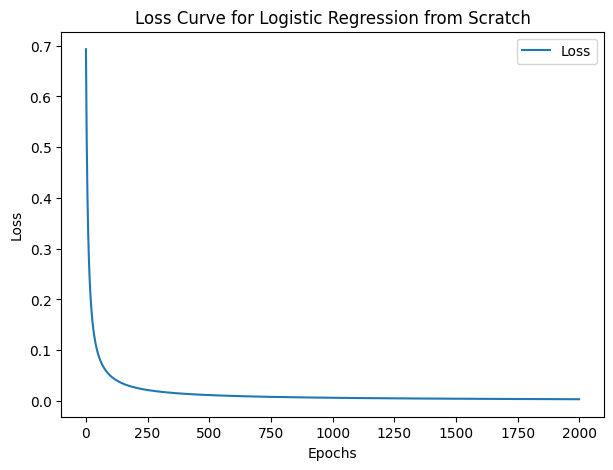

In [38]:
# Loss curve visualization
plt.figure(figsize=(7, 5))
plt.plot(range(len(model_scratch.losses)), model_scratch.losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Logistic Regression from Scratch')
plt.legend()
plt.show()

## **Bonus:**
- Extend your model to handle **multiclass classification** (one-vs-rest or softmax-based logistic regression)
- Compare your implementation's performance to that of `sklearn.linear_model.LogisticRegression`

In [48]:
#Encode labels for multiclass classification
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
n_classes = len(label_encoder.classes_)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [49]:
# Multiclass Logistic Regression using One-vs-Rest (OvR)
class LogisticRegressionScratchOvR:
    def __init__(self, learning_rate=0.1, epochs=2000,n_classes=3):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.n_classes= n_classes
        self.models = []
        self.losses = []

    def fit(self, X, y):
        samples, features = X.shape
        self.models = []
        
        for c in range(n_classes):
            y_binary = (y == c).astype(int)
            weights = np.zeros(features)
            bias = 0
            losses = []
            
            for _ in range(self.epochs):
                linear_model = np.dot(X, weights) + bias
                predictions = sigmoid(linear_model)
                
                loss = -np.mean(y_binary * np.log(predictions + 1e-9) + (1 - y_binary) * np.log(1 - predictions + 1e-9))
                losses.append(loss)
                
                dw = (1 / samples) * np.dot(X.T, (predictions - y_binary))
                db = (1 / samples) * np.sum(predictions - y_binary)
                
                weights -= self.learning_rate * dw
                bias -= self.learning_rate * db
            
            self.models.append((weights, bias))
            self.losses.append(losses)

    def predict(self, X):
        predictions = []
        for weights, bias in self.models:
            linear_model = np.dot(X, weights) + bias
            predictions.append(sigmoid(linear_model))
        return np.argmax(np.array(predictions), axis=0)

In [50]:
# Train the custom OvR model
model_scratch_ovr = LogisticRegressionScratchOvR(learning_rate=0.1, epochs=2000)
model_scratch_ovr.fit(X_train, y_train)
y_pred_scratch_ovr = model_scratch_ovr.predict(X_test)

In [51]:
# Train and compare with sklearn's multiclass Logistic Regression
model_sklearn = LogisticRegression(max_iter=2000, multi_class='ovr')
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

E:\pythonds\skillDatascience\dsenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [52]:
# Evaluate both models
metrics = ['Confusion Matrix', 'Precision', 'Recall', 'F1-Score', 'Accuracy']
results = {
    "Scratch OvR": [
        confusion_matrix(y_test, y_pred_scratch_ovr),
        precision_score(y_test, y_pred_scratch_ovr, average='weighted'),
        recall_score(y_test, y_pred_scratch_ovr, average='weighted'),
        f1_score(y_test, y_pred_scratch_ovr, average='weighted'),
        accuracy_score(y_test, y_pred_scratch_ovr)
    ],
    "Sklearn OvR": [
        confusion_matrix(y_test, y_pred_sklearn),
        precision_score(y_test, y_pred_sklearn, average='weighted'),
        recall_score(y_test, y_pred_sklearn, average='weighted'),
        f1_score(y_test, y_pred_sklearn, average='weighted'),
        accuracy_score(y_test, y_pred_sklearn)
    ]
}

In [53]:
# Print metric values
for metric, scratch_result, sklearn_result in zip(metrics, results["Scratch OvR"], results["Sklearn OvR"]):
    print(f"{metric} (Scratch OvR):\n", scratch_result)
    print(f"{metric} (Sklearn OvR):\n", sklearn_result)
    print("-" * 50)

Confusion Matrix (Scratch OvR):
 [[12  0]
 [ 0  8]]
Confusion Matrix (Sklearn OvR):
 [[12  0]
 [ 0  8]]
--------------------------------------------------
Precision (Scratch OvR):
 1.0
Precision (Sklearn OvR):
 1.0
--------------------------------------------------
Recall (Scratch OvR):
 1.0
Recall (Sklearn OvR):
 1.0
--------------------------------------------------
F1-Score (Scratch OvR):
 1.0
F1-Score (Sklearn OvR):
 1.0
--------------------------------------------------
Accuracy (Scratch OvR):
 1.0
Accuracy (Sklearn OvR):
 1.0
--------------------------------------------------


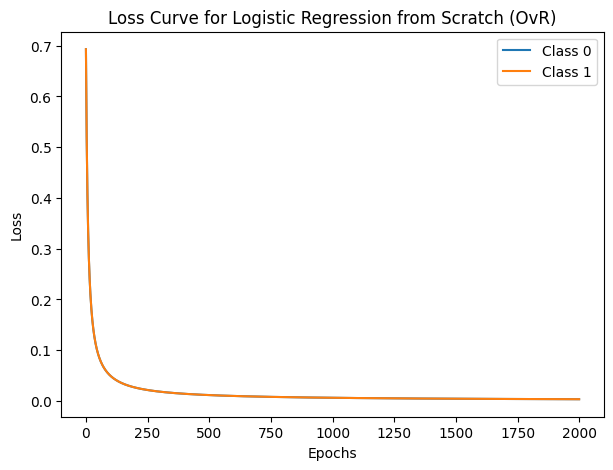

In [54]:
# Loss curve visualization
plt.figure(figsize=(7, 5))
for i, loss_curve in enumerate(model_scratch_ovr.losses):
    plt.plot(range(len(loss_curve)), loss_curve, label=f'Class {i}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Logistic Regression from Scratch (OvR)')
plt.legend()
plt.show()